In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

import os
import shutil
import random

import cv2
import albumentations as A
from PIL import Image

In [ ]:
!wget curl https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded

--2024-09-08 21:28:24--  http://curl/
Resolving curl (curl)... failed: Name or service not known.
wget: unable to resolve host address ‘curl’
--2024-09-08 21:28:24--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066 [following]
--2024-09-08 21:28:25--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.110.40, 52.92.35.162, 3.5.71.123, ...
Connecting to prod-dcd-datas

In [ ]:
!unzip -qq 'Plant_diseasess.zip'

In [ ]:
def get_file_counts_and_labels(directory):

  file_counts = []
  labels = []
  for folder_name in os.listdir(directory):
    folder_path = os.path.join(directory, folder_name)
    if os.path.isdir(folder_path):
      file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
      file_counts.append(file_count)
      labels.append(folder_name)
  return file_counts, labels


In [ ]:
directory = "Plant_leave_diseases_dataset_without_augmentation"  # Replace with your directory path
original_file_counts, original_labels = get_file_counts_and_labels(directory)

print("File counts:", original_file_counts)
print("Labels:", original_labels)

File counts: [5507, 997, 1478, 456, 1771, 1076, 275, 1676, 1383, 513, 1000, 621, 2127, 152, 854, 630, 985, 1404, 1591, 373, 1000, 1162, 360, 952, 5090, 371, 5357, 1909, 1052, 1143, 1180, 1109, 1835, 2297, 1502, 423, 1000, 1192, 1645]
Labels: ['Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Strawberry___healthy', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Cedar_apple_rust', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Esca_(Black_Measles)', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Potato___healthy', 'Cherry___healthy', 'Apple___Apple_scab', 'Corn___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Tomato_mosaic_virus', 'Potato___Early_blight', 'Corn___healthy', 'Peach___healthy', 'Tomato___Leaf_Mold', 'Soybean___healthy', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf

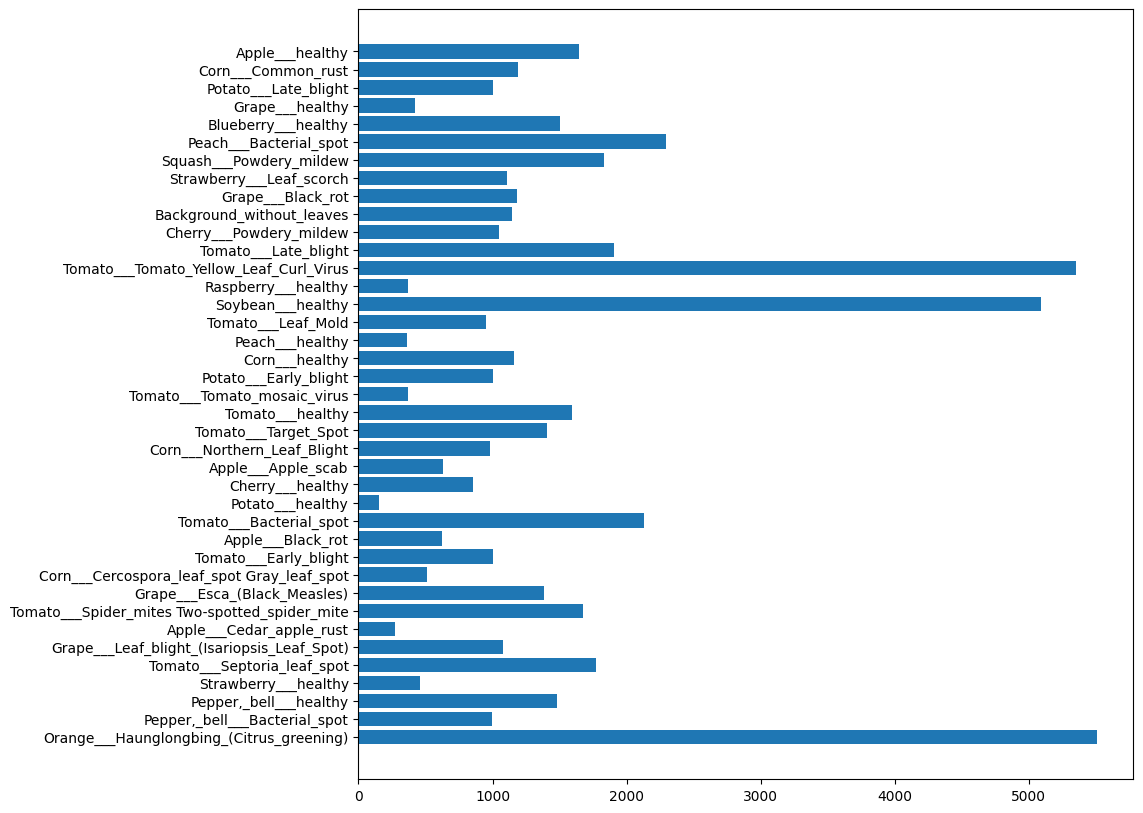

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(original_labels, original_file_counts)
plt.show()

In [ ]:
d = {'labels' : original_labels, 'count' : original_file_counts}
df = pd.DataFrame(d)
df

,labels,count
0,Orange___Haunglongbing_(Citrus_greening),5507
1,"Pepper,_bell___Bacterial_spot",997
2,"Pepper,_bell___healthy",1478
3,Strawberry___healthy,456
4,Tomato___Septoria_leaf_spot,1771
5,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1076
6,Apple___Cedar_apple_rust,275
7,Tomato___Spider_mites Two-spotted_spider_mite,1676
8,Grape___Esca_(Black_Measles),1383
9,Corn___Cercospora_leaf_spot Gray_leaf_spot,513


In [ ]:
df_sorted = df.sort_values('count',ascending=False)
df_sorted

,labels,count
0,Orange___Haunglongbing_(Citrus_greening),5507
26,Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357
24,Soybean___healthy,5090
33,Peach___Bacterial_spot,2297
12,Tomato___Bacterial_spot,2127
27,Tomato___Late_blight,1909
32,Squash___Powdery_mildew,1835
4,Tomato___Septoria_leaf_spot,1771
7,Tomato___Spider_mites Two-spotted_spider_mite,1676
38,Apple___healthy,1645


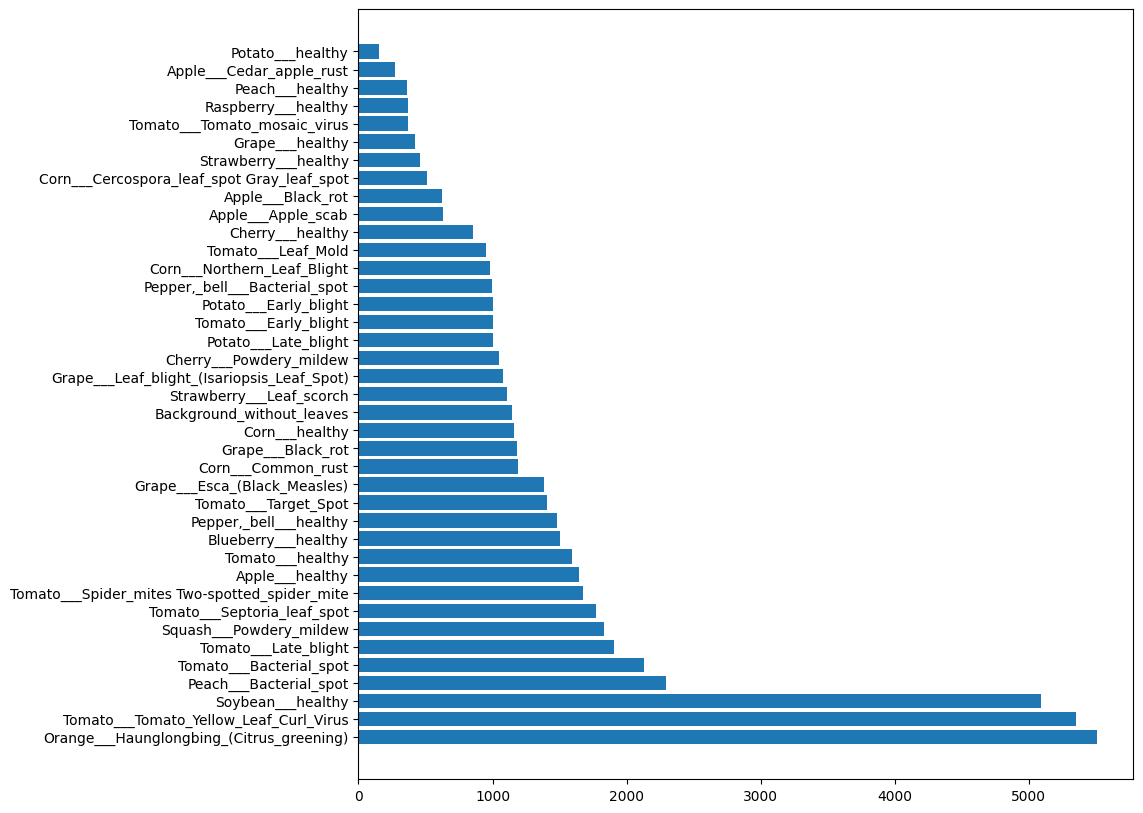

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(df_sorted['labels'],df_sorted['count'])
plt.show()

In [ ]:
df.describe()

,count
count,39.000000
mean,1421.743590
std,1255.729662
min,152.000000
25%,742.000000
50%,1109.000000
75%,1618.000000
max,5507.000000


In [ ]:
def show_random_images(directory, num_images=9):
  """
  Displays random images from random classes in the specified directory.

  Args:
    directory: The directory containing the image folders.
    num_images: The number of images to display.
  """
  classes = os.listdir(directory)
  selected_classes = random.sample(classes, num_images)

  plt.figure(figsize=(8, 8))
  for i, class_name in enumerate(selected_classes):
    class_path = os.path.join(directory, class_name)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    image_path = os.path.join(class_path, random.choice(images))

    img = plt.imread(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

  plt.show()


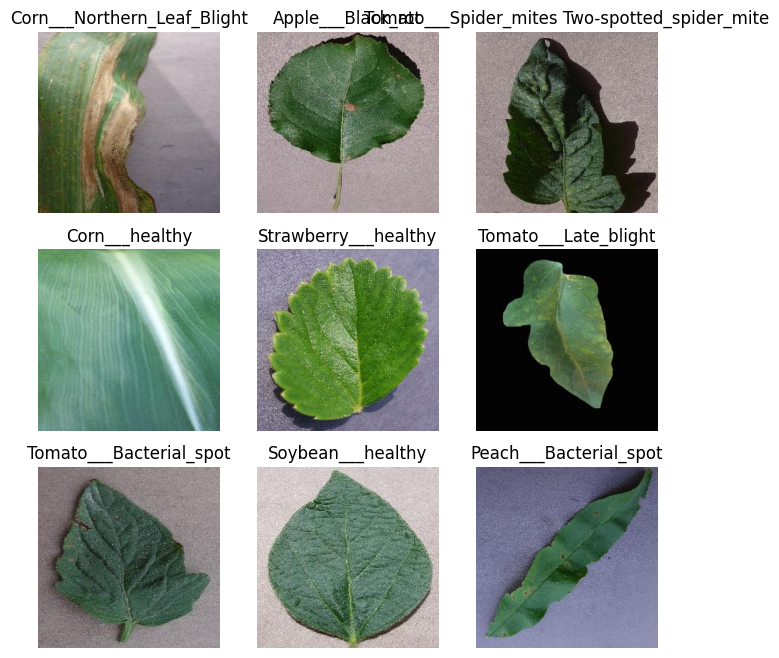

In [ ]:
directory = "Plant_leave_diseases_dataset_without_augmentation"
show_random_images(directory)

In [ ]:
def augment_image(image_path, output_folder, filename,transform,num_augmented_images):
    # Load the image using OpenCV (BGR format)
    image = cv2.imread(image_path)

    # Apply the augmentations
    for i in range(1 , num_augmented_images):
        # Apply the augmentations
        augmented = transform(image=image)['image']

        # Convert the augmented image back to RGB (from BGR)
        augmented = cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB)

        # Save the augmented image using PIL
        augmented_image = Image.fromarray(augmented)
        save_path = os.path.join(output_folder, f'aug_{i}_{filename}')
        augmented_image.save(save_path)

    # Save the augmented image using PIL
    try:
        augmented_image = Image.fromarray(augmented)
    except UnboundLocalError:
        augmented_image = Image.fromarray(image)

    #augmented_image = Image.fromarray(augmented)
    save_path = os.path.join(output_folder, f'aug_{filename}')
    augmented_image.save(save_path)

In [ ]:
# Define the folder paths
input_folder = '/content/Plant_leave_diseases_dataset_without_augmentation'  # Folder with original images
output_folder = '/content/Plant_leave_diseases_dataset_with_augmentation'  # Folder to save augmented images
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
def augment_class(classname,num_augmented_images):
  transform = A.Compose([
    A.Rotate(limit=40),  # Rotation up to 40 degrees
    A.HorizontalFlip(p=0.5),  # 50% chance of horizontal flip
    A.VerticalFlip(p=0.5),  # 50% chance of vertical flip
    A.RandomCrop(width=128, height=128),  # Crop the image to 200x200
    A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3)  # Color jittering
])
  input_folder1 = os.path.join(input_folder,classname)
  output_folder1 = os.path.join(output_folder,classname)

  if not os.path.exists(output_folder1):
    os.makedirs(output_folder1)

  for filename in os.listdir(input_folder1):
    if filename.lower().endswith('.jpg') or filename.lower().endswith('.png') or filename.lower().endswith('.jpeg'):  # Add more extensions if needed
        img_path = os.path.join(input_folder1, filename)
        augment_image(img_path, output_folder1, filename,transform,num_augmented_images)

In [ ]:
for i,cls in enumerate(original_labels):
  number_of_images = np.math.ceil(4500/original_file_counts[i])
  augment_class(cls,number_of_images)

<ipython-input-16-962cceac6b79>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  number_of_images = np.math.ceil(4500/original_file_counts[i])


In [ ]:
directory = "/content/Plant_leave_diseases_dataset_with_augmentation"  # Replace with your directory path
aug_file_counts, aug_labels = get_file_counts_and_labels(directory)

print("File counts:", aug_file_counts)
print("Labels:", aug_labels)

File counts: [5507, 4985, 5912, 4560, 5313, 5380, 4675, 5028, 5532, 4617, 5000, 4968, 6381, 4560, 5124, 5040, 4925, 5616, 4773, 4849, 5000, 4648, 4680, 4760, 5090, 4823, 5357, 5727, 5260, 4572, 4720, 5545, 5505, 4594, 4506, 4653, 5000, 4768, 4935]
Labels: ['Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Strawberry___healthy', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Cedar_apple_rust', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Esca_(Black_Measles)', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Potato___healthy', 'Cherry___healthy', 'Apple___Apple_scab', 'Corn___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Tomato_mosaic_virus', 'Potato___Early_blight', 'Corn___healthy', 'Peach___healthy', 'Tomato___Leaf_Mold', 'Soybean___healthy', 'Raspberry___healthy', 'Tomato___Toma

In [ ]:
d1 = {'labels' :aug_labels, 'count':aug_file_counts}
df1 = pd.DataFrame(d1)
df1

,labels,count
0,Orange___Haunglongbing_(Citrus_greening),5507
1,"Pepper,_bell___Bacterial_spot",4985
2,"Pepper,_bell___healthy",5912
3,Strawberry___healthy,4560
4,Tomato___Septoria_leaf_spot,5313
5,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),5380
6,Apple___Cedar_apple_rust,4675
7,Tomato___Spider_mites Two-spotted_spider_mite,5028
8,Grape___Esca_(Black_Measles),5532
9,Corn___Cercospora_leaf_spot Gray_leaf_spot,4617


In [ ]:
df1_sorted = df1.sort_values('count',ascending = False)

In [ ]:
df1_sorted

,labels,count
12,Tomato___Bacterial_spot,6381
2,"Pepper,_bell___healthy",5912
27,Tomato___Late_blight,5727
17,Tomato___Target_Spot,5616
31,Strawberry___Leaf_scorch,5545
8,Grape___Esca_(Black_Measles),5532
0,Orange___Haunglongbing_(Citrus_greening),5507
32,Squash___Powdery_mildew,5505
5,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),5380
26,Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357


In [ ]:
import os
import shutil
import random

def split_dataset(source_dir, test_dir, test_ratio=0.2):
    # Create the test directory if it doesn't exist
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Get all class folders in the source directory
    class_folders = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]

    for class_folder in class_folders:
        class_source = os.path.join(source_dir, class_folder)
        class_test = os.path.join(test_dir, class_folder)

        # Create the class folder in the test directory if it doesn't exist
        if not os.path.exists(class_test):
            os.makedirs(class_test)

        # Get all the images in the current class folder
        images = [f for f in os.listdir(class_source) if os.path.isfile(os.path.join(class_source, f))]

        # Shuffle and split the dataset based on the test_ratio
        random.shuffle(images)
        test_count = int(len(images) * test_ratio)
        test_images = images[:test_count]

        # Move selected images to the test directory
        for image in test_images:
            shutil.move(os.path.join(class_source, image), os.path.join(class_test, image))

        print(f"Moved {test_count} images from {class_folder} to {class_test}.")

# Example usage:
source_dir = '/content/Plant_leave_diseases_dataset_with_augmentation'
test_dir = '/content/Test'
split_dataset(source_dir, test_dir, test_ratio=0.2)


Moved 1101 images from Orange___Haunglongbing_(Citrus_greening) to /content/Test/Orange___Haunglongbing_(Citrus_greening).
Moved 997 images from Pepper,_bell___Bacterial_spot to /content/Test/Pepper,_bell___Bacterial_spot.
Moved 1182 images from Pepper,_bell___healthy to /content/Test/Pepper,_bell___healthy.
Moved 912 images from Strawberry___healthy to /content/Test/Strawberry___healthy.
Moved 1062 images from Tomato___Septoria_leaf_spot to /content/Test/Tomato___Septoria_leaf_spot.
Moved 1076 images from Grape___Leaf_blight_(Isariopsis_Leaf_Spot) to /content/Test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot).
Moved 935 images from Apple___Cedar_apple_rust to /content/Test/Apple___Cedar_apple_rust.
Moved 1005 images from Tomato___Spider_mites Two-spotted_spider_mite to /content/Test/Tomato___Spider_mites Two-spotted_spider_mite.
Moved 1106 images from Grape___Esca_(Black_Measles) to /content/Test/Grape___Esca_(Black_Measles).
Moved 923 images from Corn___Cercospora_leaf_spot Gray_leaf_sp

In [ ]:
image_size = (224, 224)  # Resize to this size
batch_size = 32
test_split = 0.2
seed = 123
dataset_dir = '/content/Plant_leave_diseases_dataset_with_augmentation'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=test_split,  # Splitting dataset
    subset="training",            # Training subset
    seed=seed,
    image_size=image_size,        # Resizing images
    batch_size=batch_size,
    interpolation="bilinear",
    label_mode='int' # Interpolation method (you can use 'bicubic' here)
)

Found 157521 files belonging to 39 classes.
Using 126017 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=test_split,  # Splitting dataset
    subset="validation",          # Validation subset
    seed=seed,
    image_size=image_size,        # Resizing images
    batch_size=batch_size,
    interpolation="bilinear",      # Interpolation method (you can use 'bicubic' here)
    label_mode='int'
)

Found 157521 files belonging to 39 classes.
Using 31504 files for validation.


In [ ]:
test_dir = '/content/Test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,        # Resizing images
    batch_size=batch_size,
    interpolation="bilinear"      # Interpolation method (you can use 'bicubic' here)
    ,label_mode='int'
)

Found 39367 files belonging to 39 classes.


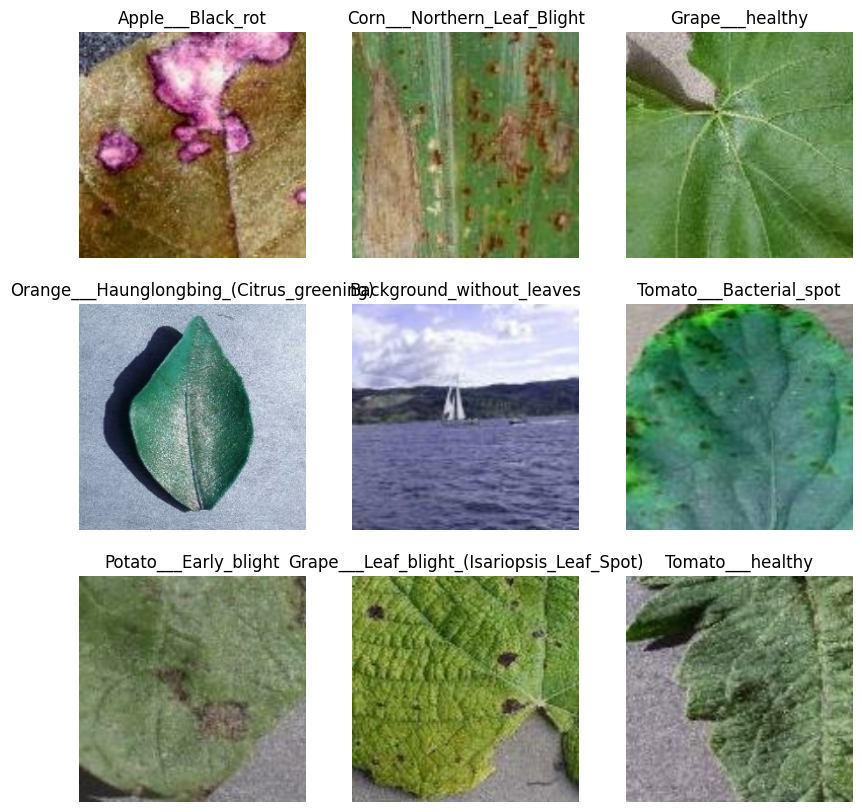

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
len(class_names)

39

In [ ]:
!zip -rqq /content/dataset.zip /content/Plant_leave_diseases_dataset_with_augmentation


In [ ]:
!mv "/content/dataset.zip" "/content/drive/MyDrive/Courses"

In [ ]:
!zip -rqq /content/test.zip /content/Test

In [ ]:
!mv "/content/test.zip" "/content/drive/MyDrive/Courses"